In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

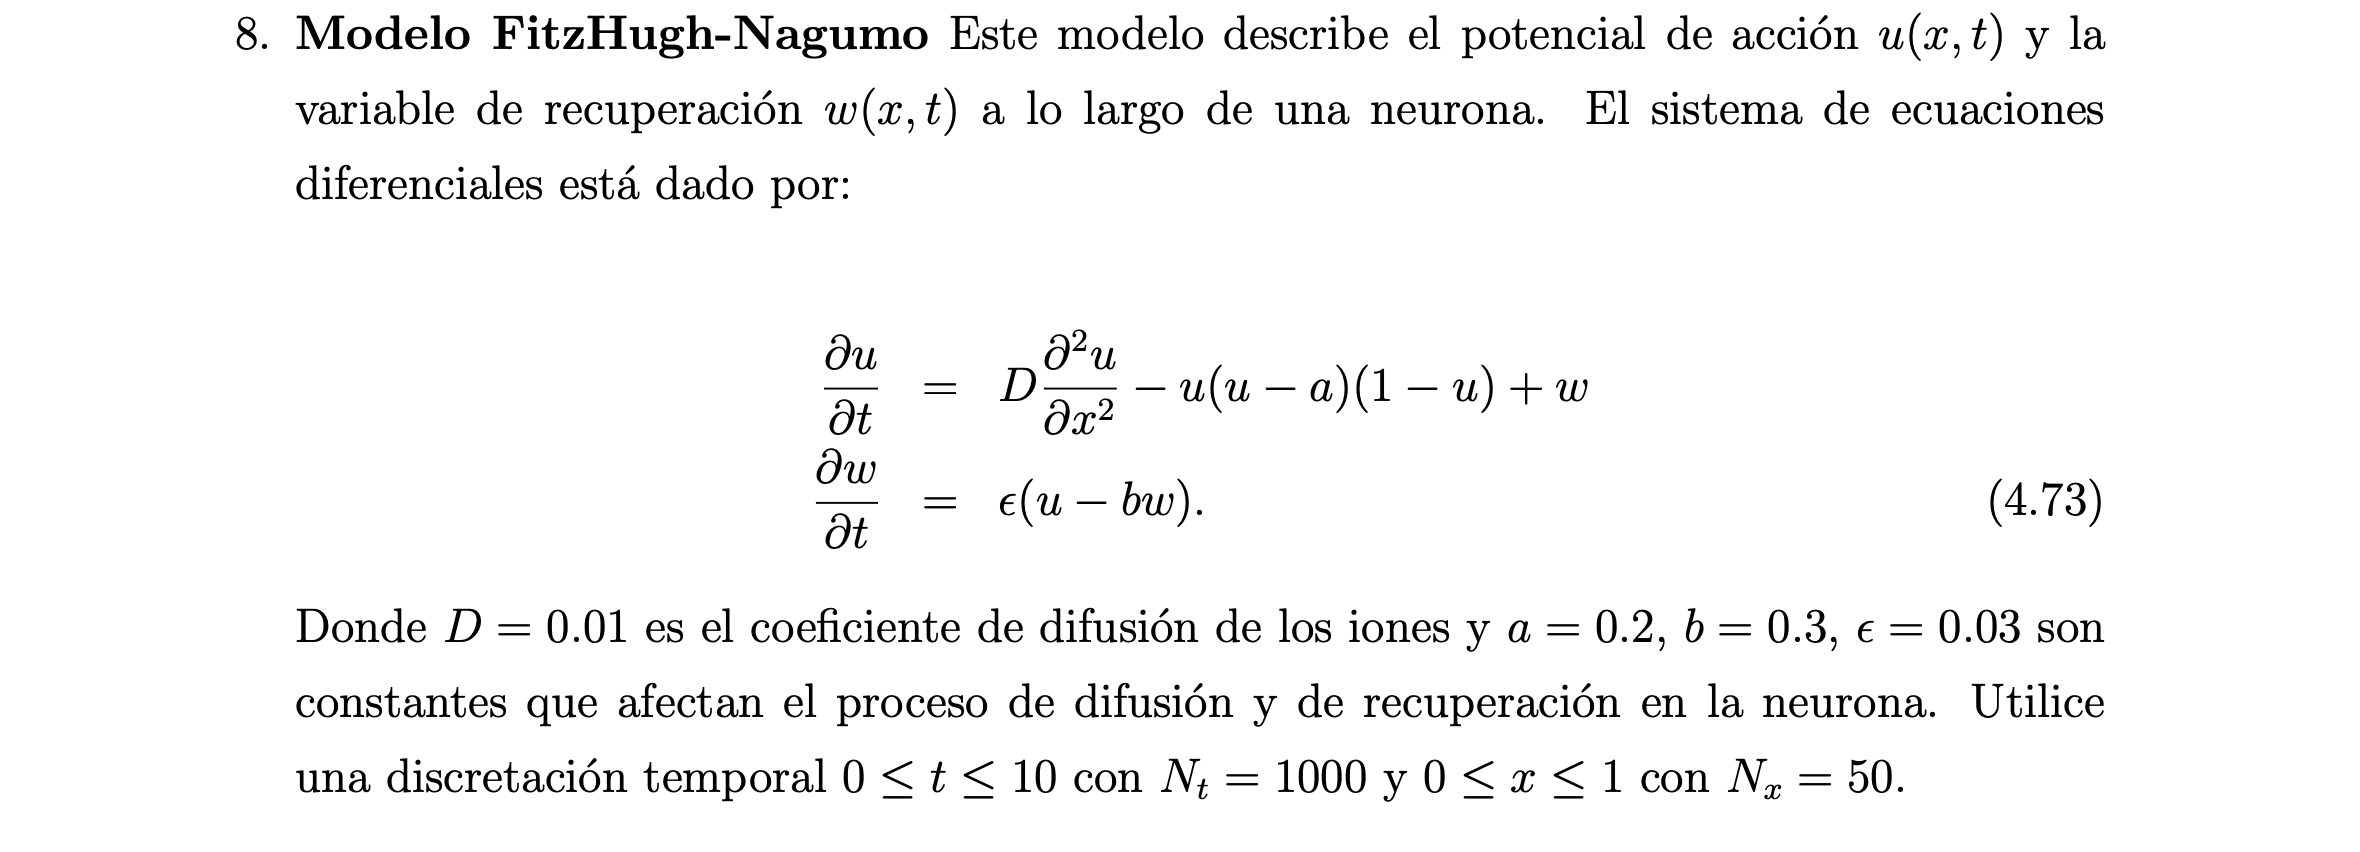

In [2]:
Nt = 1000
Nx = 50

x = np.linspace(0,1,Nx)
t = np.linspace(0,10,Nt)

dx = x[1] - x[0]
dt = t[1] - t[0]

v = 1

lambda_ = 0.01*dt/dx**2
print(lambda_)

0.2403403403403404


In [3]:
def Init():
    
    u = np.zeros((Nt, Nx))
    w = np.zeros((Nt, Nx))
    
    u[0, 1:-1] = np.random.uniform(0,0.3, len(x)-2)
    u[:,0] = 0.1
    u[:,-1] = 0.2
        
    return u, w

In [4]:
u,w = Init()

In [5]:
a, b, epsilon, D = 0.2, 0.3, 0.03, 0.01

In [6]:
def h1(t):
    return np.random.uniform(0,0.3)

In [7]:
def GetSolution():
    for l in tqdm(range(1, len(t))):
        for i in range(1, len(x) - 1):
            u[l, i] = u[l-1, i] + dt * (D * (u[l-1, i + 1] - 2 * u[l-1, i] + u[l-1, i - 1]) / dx**2 \
                                       - u[l-1, i] * (u[l-1, i] - a) * (1 - u[l-1, i]) \
                                       + w[l-1, i])
            w[l, i] = w[l-1, i] + dt * epsilon * (u[l-1, i] - b * w[l-1, i])

In [8]:
GetSolution()

100%|██████████████████████████████████████| 999/999 [00:00<00:00, 11004.39it/s]


<IPython.core.display.Javascript object>


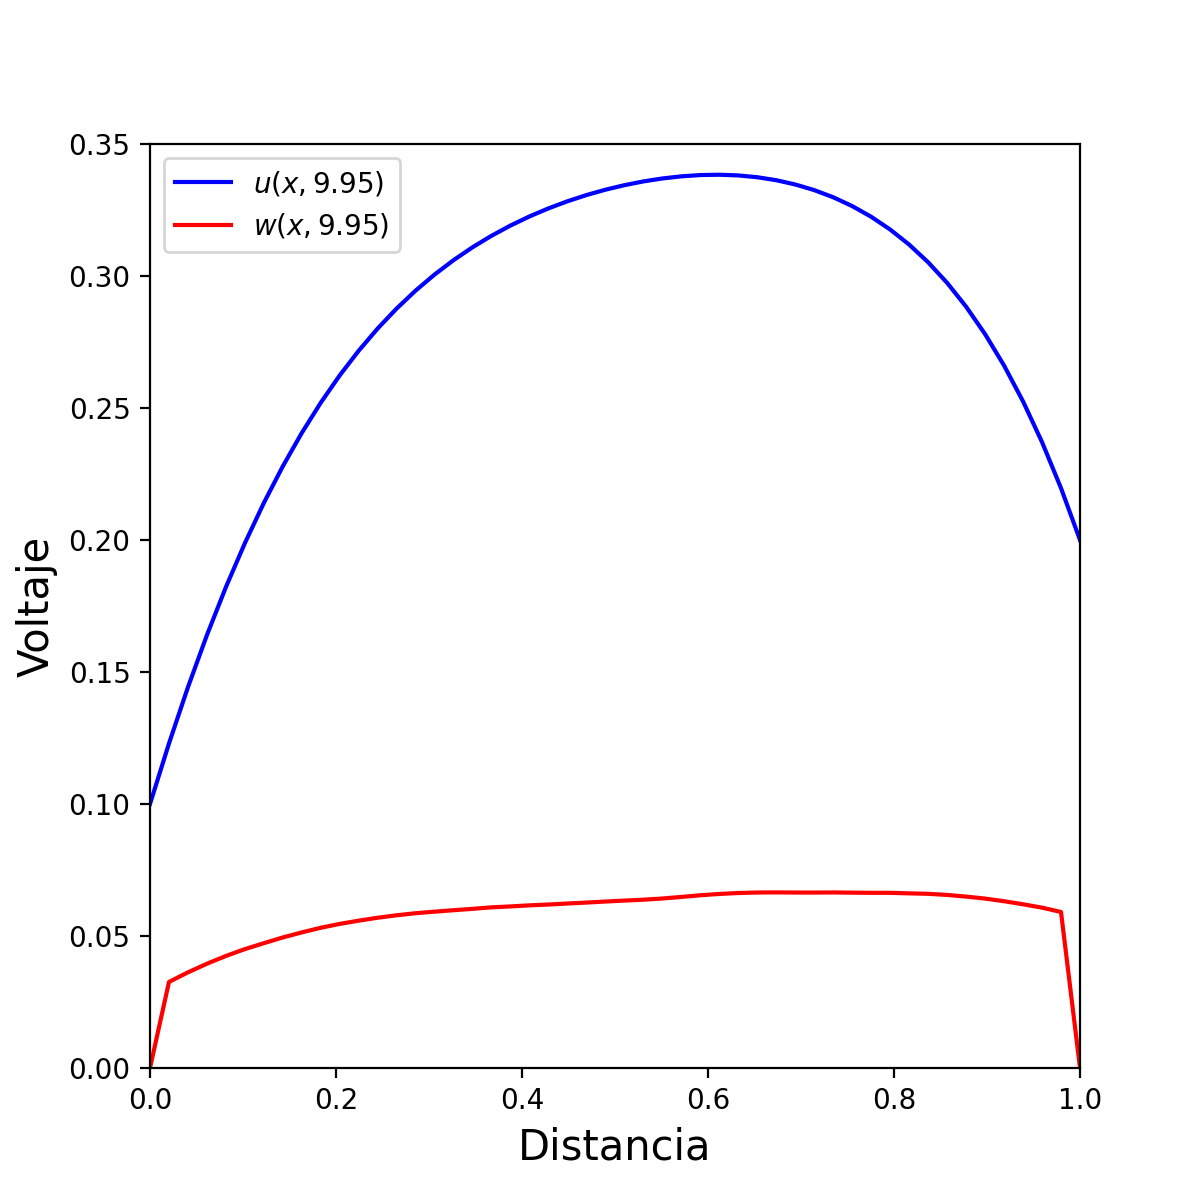

In [10]:

# Zona de animacion
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

def init():
    
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(0,0.35)
    ax.set_xlabel('Distancia', fontsize=15)
    ax.set_ylabel('Voltaje', fontsize=15)    
    
def Update(i):
    plot = ax.clear()
    init()
    plot = ax.plot(x, u[i,:],color='b', label=r'$u(x,%.2f)$' %(t[i]))
    
    plot = ax.plot(x, w[i,:] ,color='r', label=r'$w(x,%.2f)$' %(t[i]))

    plot = plt.legend(loc=0)
    
    return plot

Animation = animation.FuncAnimation(fig, Update, frames=len(t), init_func=init)